<a href="https://colab.research.google.com/github/Musungu-Maureen/IP-WEEK-7-CORE/blob/main/Maureen_Musungu_Week_7_Core_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Pricing 

## Defining the Question

### a) Specifying the Data Analytic Question 

The main aim of this project is to study the factors that affect housing prices and to create a model that would be used to accurately predict sales as per souse prices. 

### b) Defining the Metric for Success

The study will be considered a success if we succeed to create a model that would enable the real estate company to predict sale of prices.  

### c) Understanding the Context

This is a study conducted by a data scientist who works for Hass Consulting Company which is a real estate leader with over 25 years of experience. This company is interested in studying the factors that affect housing prices using the given information on real estate properties and later on have a model that  would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### d) Experimental Design Taken 

We shall be conducting Exploratory Data Analysis on the data in order to study the relationships between different variables. 
Then we will create a number of regression models using different techniques and then decide on the most appropriate model to be used. 


### e) Data Relevance 

The data availed contains information on real estate properties. It is made up of 19 columns which have information that explain different house characterictics and their prices.
This dataset is relevant for our study. 

## Reading the Data

In [1]:
## importing the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
## loading the dataset
house_data = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

# previewing the top of our data
house_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Previewing the bottom of our data
house_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Checking the Data

In [37]:
# Checking the shape of the dataset
house_data.shape

# The dataset contains 21613 rows and 20 columns.

(21613, 20)

In [38]:
# Checking the datatypes
house_data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [39]:
# Checking for null values 
house_data.isnull().sum()

# No null values in the data

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Checking for duplicates

house_data.duplicated().sum()



3

In [5]:
house_data = house_data.drop_duplicates()
house_data
house_data.duplicated().sum()

# We have dropped the duplicate entries

0

In [42]:
# Checking the 'condition' column
house_data['condition'].unique()

## The values in this column represent the condition of a house on a grade from 1 to 5. 

array([3, 5, 4, 1, 2])

In [43]:
# Checking the 'grade' column
house_data['grade'].unique()

# The houses have been graded from 1 to 13.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [44]:
## Checking the 'view' column
house_data['view'].unique()

## the values in this column run from 1 to 4. 

array([0, 3, 4, 2, 1])

In [49]:
# Checking the 'waterfront' column
house_data['waterfront'].unique()

# This is a boolean that states whether a house has a waterfront or not. 

array([0, 1])

## Tidying the Dataset

In [6]:
# Renaming some columns
house_data.rename(columns={'sqft_living':'living_room', 'sqft_lot':'parking_lot'}, inplace=True)
house_data


,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Checking** **for** **Outliers**

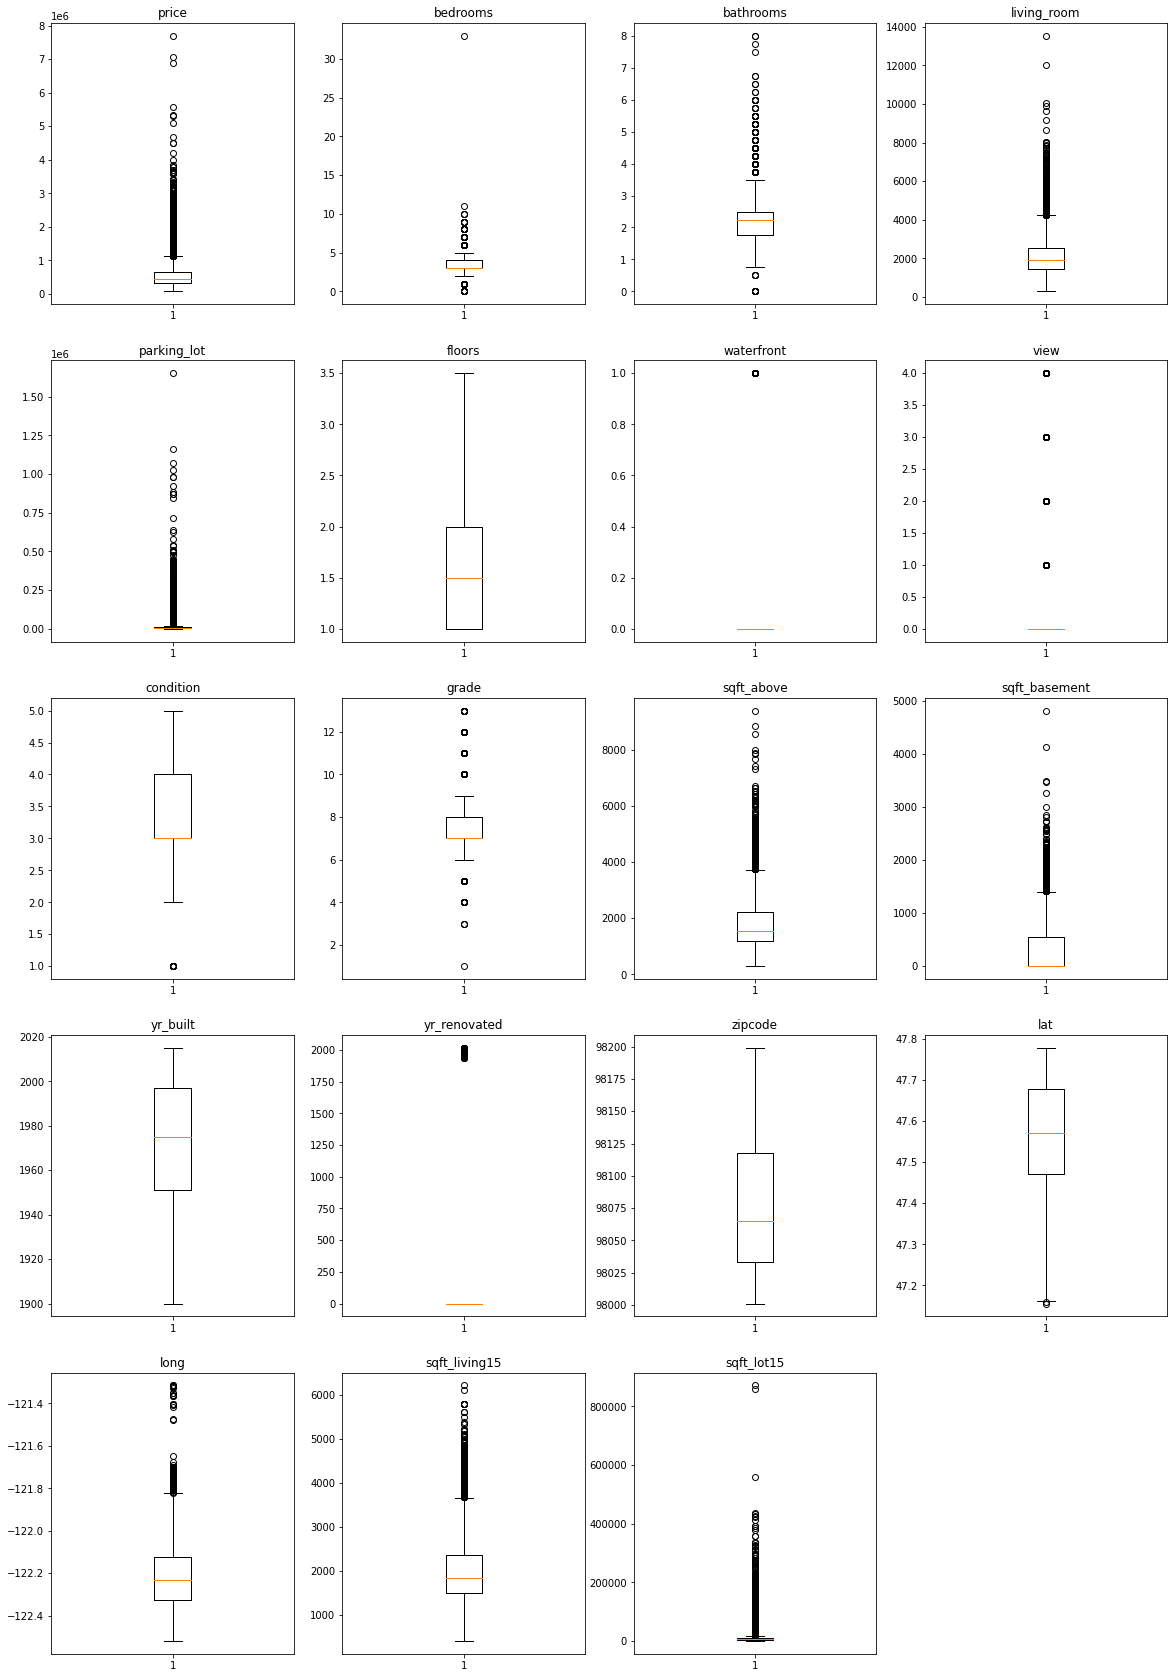

In [243]:
# Creating a dictionary containing all our columns
house_columns={'price':1, 'bedrooms':2, 'bathrooms':3, 'living_room':4, 'parking_lot':5,
       'floors':6, 'waterfront':7, 'view':8, 'condition':9, 'grade':10, 'sqft_above':11,
       'sqft_basement':12, 'yr_built':13, 'yr_renovated':14, 'zipcode':15, 'lat':16, 'long':17,
       'sqft_living15':18, 'sqft_lot15':19}
plt.figure(figsize=(20,30))

# A function to create boxplots for our numerical columns
for variable,i in house_columns.items():
  plt.subplot(5,4,i)
  plt.boxplot(house_data[variable])
  plt.title(variable)
plt.show()


* We have outliers in our data but we shall not remove them since these values could be truthful as the real estate sector has values on both extremes. 

## Exploratory Data analysis

In [7]:
# Statistical summaries of the data
house_data.describe()

,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5b4b6ce90>,
      dtype=object)

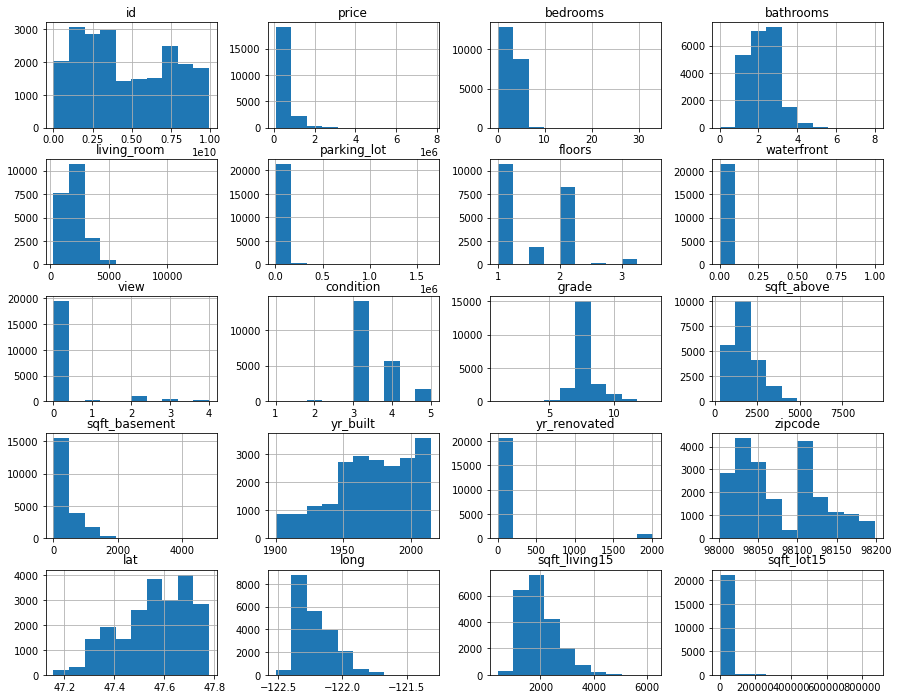

In [245]:
# Plotting histograms to view data distribution
house_data.hist(figsize = (15, 12))

In [246]:
house_data.head()

,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


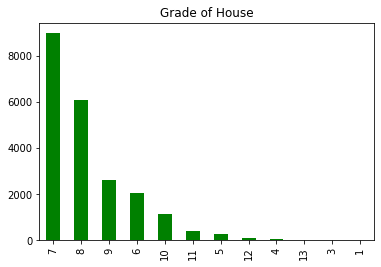

In [226]:
# Checking the grade of house with highest sale
house_data['grade'].value_counts().plot.bar(title='Grade of House', color='green')

* Most purchased houses are of grade 7 and the least purchased are of grade 4. 

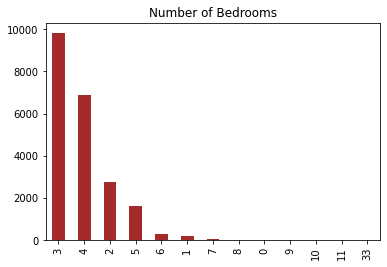

In [227]:
# Checking No of bedrooms of houses with highest sale
house_data['bedrooms'].value_counts().plot.bar(title='Number of Bedrooms', color='brown')

* Many of the houses purchased have 3 bedrooms. 

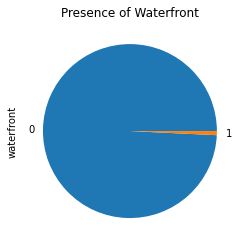

In [74]:
## Checking preference of waterfront in house purchase
house_data['waterfront'].value_counts().plot.pie(title='Presence of Waterfront')

* Many house buyers purchased houses without a waterfront. 

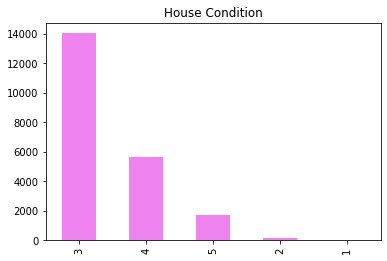

In [228]:
house_data['condition'].value_counts().plot.bar(title='House Condition', color='violet')

* Many of the houses bought had a value of 3 when it comes to their condition. 

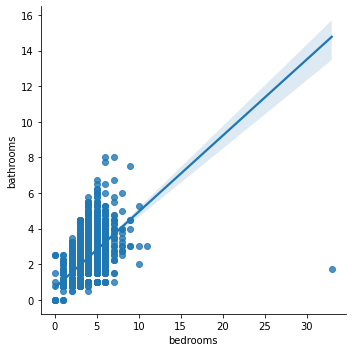

In [229]:
 sns.lmplot(x="bedrooms", y="bathrooms", data=house_data)

* There is a sort of linear relation between the number of bathrooms and bedrooms, whereby as number of bedrooms increase so does the number of bathrooms. 

[Text(0, 0.5, 'Grade Level'), Text(0.5, 1.0, 'Conditions per Grade')]

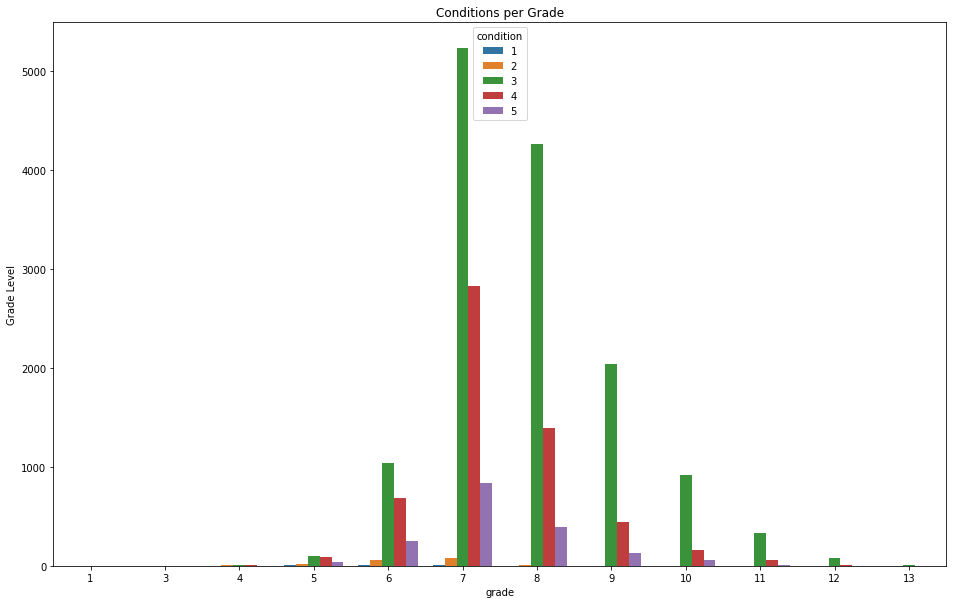

In [105]:
# investigating the relationship between grade and condition
plt.figure(figsize=(16,10))
grade_cond = sns.countplot('grade', hue = 'condition', data = house_data)
grade_cond.set(title = "Conditions per Grade",
        ylabel = "Grade Level")

* We get to see that houses in grade 7 in condition 3 has the most sales. 

## Modelling

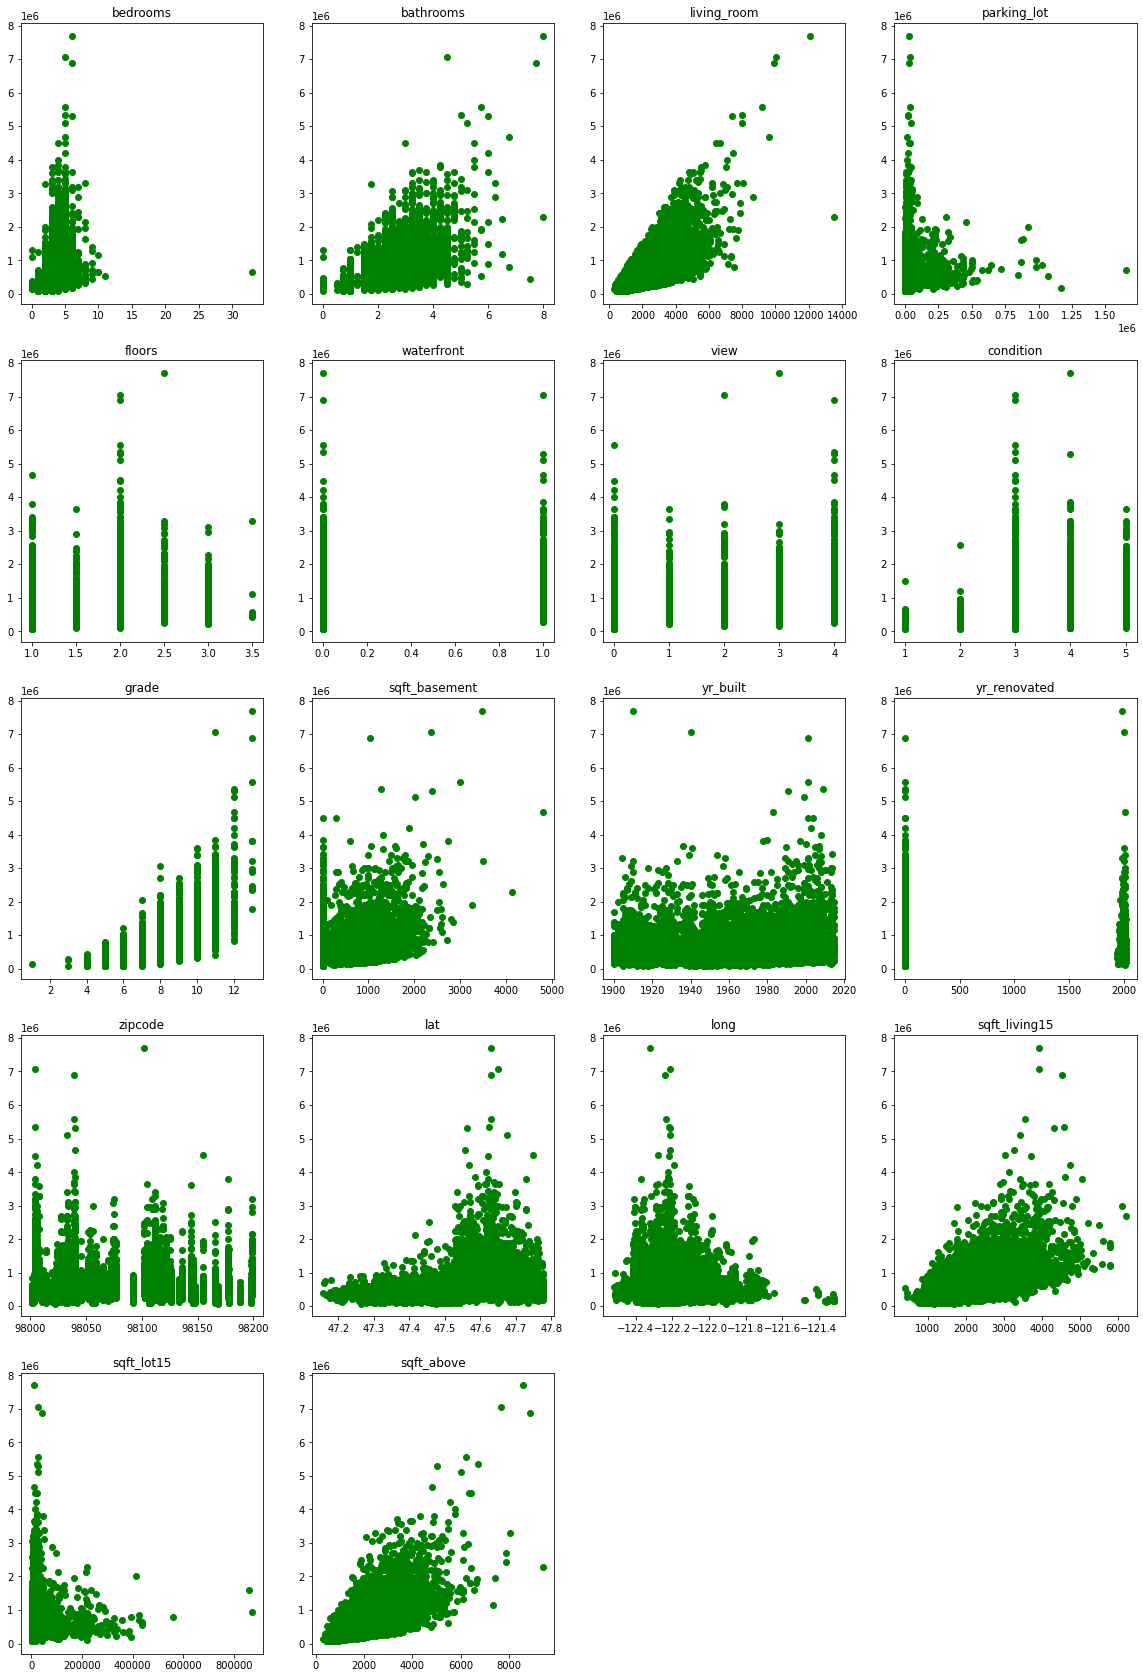

In [248]:
## Checking the relationship between the dependent and independent variables 
columns_dict={'bedrooms':1, 'bathrooms':2, 'living_room':3, 'parking_lot':4,
       'floors':5, 'waterfront':6, 'view':7, 'condition':8, 'grade':9,
       'sqft_basement':10, 'yr_built':11, 'yr_renovated':12, 'zipcode':13, 'lat':14, 'long':15,
       'sqft_living15':16, 'sqft_lot15':17, 'sqft_above':18}
plt.figure(figsize=(20,30))
# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.scatter(house_data[variable], house_data['price'], color='green')
  plt.title(variable)
plt.show()

* Some variables have a linear relationship with the price while others do not. 

In [8]:
# Checking for multicollinearity
corr = house_data.corr()
corr

,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
living_room,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
parking_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


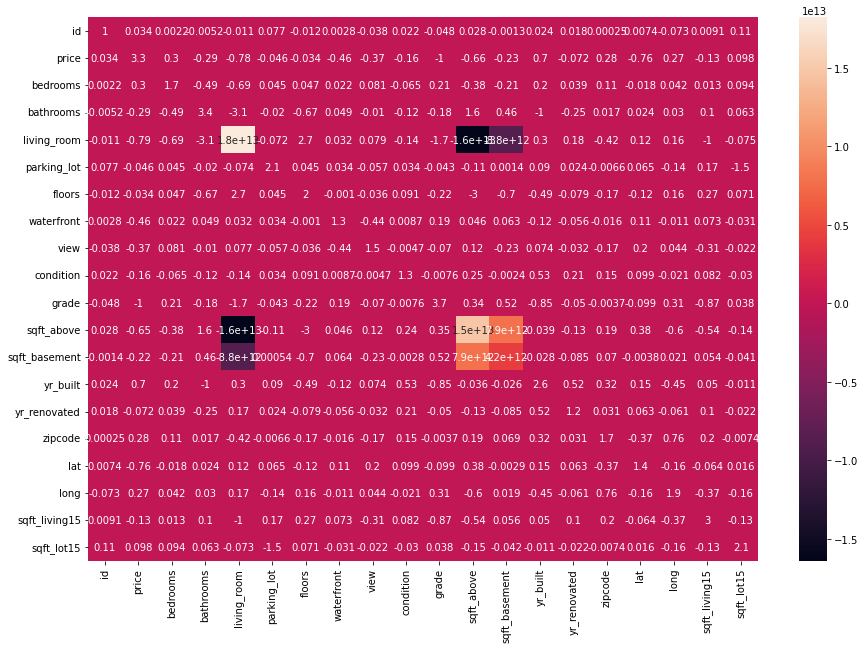

In [9]:
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

* After applying the VIF we notice that 'sqft_above' and 'sqft_basement' show  high multicollinearity with other variables and thus should be dropped as linear regression assumes little to no multicollinearity of variables. 

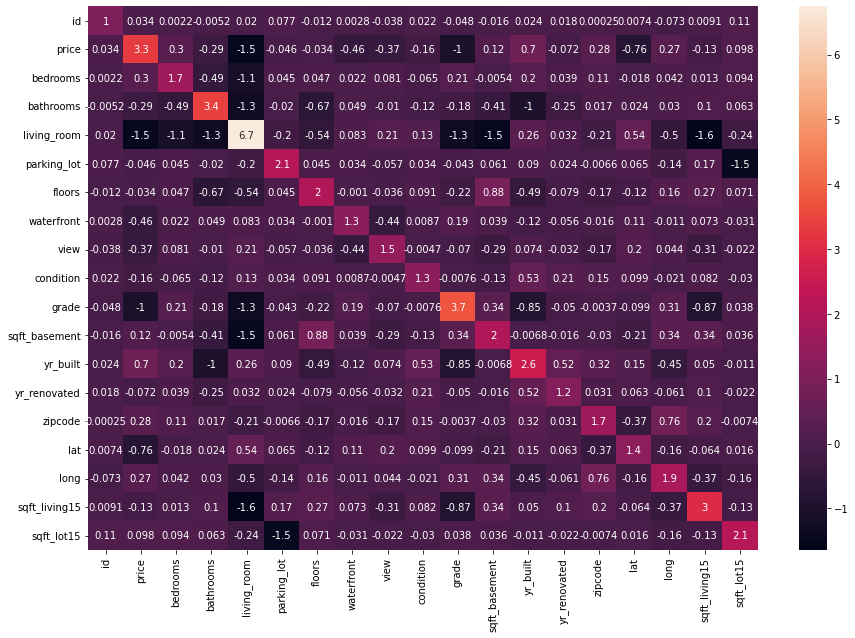

In [10]:
# we will drop 'sqft_living' and 'sqft_basement' 
house_data = house_data.drop(columns = ['sqft_above'])
corr2 = house_data.corr()
vif2 = pd.DataFrame(np.linalg.inv(corr2.values), index = corr2.index, columns = corr2.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif2, annot = True)

* The new improved heat map is much better as the variables have lower correlation. The VIF has drastically dropped after dropping the two columns. 

### Multiple Linear Regression

In [11]:
house_data.head()

,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [255]:
## We shall use the variables that show linear relationship with our target variable  
# i.e., 'bedrooms','bathrooms', 'living_room' and 'sqft_basement']

#Splitting our data
data = house_data[['bedrooms','bathrooms','living_room','sqft_basement']]
X1 = data
y1 = house_data['price']


In [257]:
# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=25)

In [258]:
#Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [259]:
# Getting a dataframe of our actual and predicted values 
lin_df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
lin_df.head()

,Actual,Predicted
20371,745000.0,911048.667034
8524,320000.0,542886.352493
15420,336750.0,396103.187546
14214,350000.0,351031.348026
16420,352750.0,299490.798694


In [260]:
# Getting the model's coefficients and intercept
print('Coefficients: \n', model.coef_)

print('Intercept: \n',model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y1_test, y1_pred))

Coefficients: 
 [-54314.95931691   5691.3386894  282656.58396476  10821.62480078]
Intercept: 
 540677.4986537575
Mean squared error: 62741723445.89
Coefficient of determination: 0.51


* In this case,we get a coefficient of determination of 51% and mean squared error of 62,741,723,445.89


In [261]:
house_data.head()

,id,price,bedrooms,bathrooms,living_room,parking_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [262]:
## Modelling with all the variables in the dataset

#Splitting the data
X = house_data.iloc[:, 2:18].values
y = house_data.iloc[:, 1].values


In [16]:
# Scaling data 
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [19]:
#Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [265]:
# To compare the actual output values for X_test with the predicted values
# 
multi_lin = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
multi_lin.head()

,Actual,Predicted
0,745000.0,879149.092075
1,320000.0,375665.289827
2,336750.0,447089.664757
3,350000.0,505775.571540
4,352750.0,197303.373802


In [266]:
# print the coefficients and intercept
print('Coefficients: \n', regressor.coef_)

print('Intercept: \n',regressor.intercept_)

Coefficients: 
 [-32871.10591359  29634.53016986 167152.00632615   -785.85379979
   4342.07875795  50980.99421804  42270.64599811  17263.8197644
 111656.88925023 -14156.48069012 -75678.83439772   8234.40542646
 -31745.90746401  84702.41262306 -31819.22743698  16191.56429091]
Intercept: 
 540377.1345599557


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y_test, y_pred))

Mean squared error: 38261438757.22
Coefficient of determination: 0.71


* We can see that the coefficient of determination has improved to 70% and the MSE has reduced to 37,793,193,241.20. 
It is therefore advisable to use all the variables for prediction in this case. 

## Recommendation

**Residual Plot**

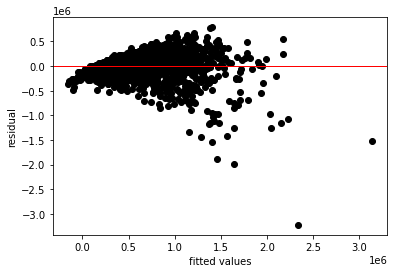

In [268]:
# plotting the residuals
residuals = np.subtract(y_pred, y_test)

plt.scatter(y_pred, residuals, color = 'black')
plt.figsize = [12, 10]
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 1)
plt.show()

**Heteroskedasticity**

In [269]:
## We shall be using the Bartlett's test for this task
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# In order to interpret the results, we  compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred) - 1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

print("Degree of Freedom:", degree_of_freedom)
print("Probability:", probability)
print("Critical Value:", critical_value)

Test result: 868.7762169825293
P-value: 6.020452243672628e-191
Degree of Freedom: 4321
Probability: 1.0
Critical Value: inf


In [270]:
if (test_result > critical_value):
  print('The variances are (heterogeneous), and the model needs to be reassessed.')
else:
  print('The variances are (homogeneous). The model is doing well.')

The variances are (homogeneous). The model is doing well.


### Quantile Regression

In [12]:
## Ensuring our target variable is continous
house_data['price'].dtype

#It is a float, we are good to go!

dtype('float64')

In [13]:
# Encoding the 'grade' variable
from sklearn.preprocessing import LabelEncoder

le_ = LabelEncoder().fit(house_data['grade'].unique())
class_ = le_.classes_
house_data['grade'] = le_.transform(house_data['grade'].values)

In [106]:
## Initializing the data
X = house_data[['bedrooms','bathrooms', 'living_room','view','grade', 'sqft_basement', 'lat', 'sqft_living15']]
y = house_data['price']

In [88]:
# splitting our  dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [89]:
# Starting with linear regression
model = LinearRegression(fit_intercept = True, normalize = False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error: {0:.2f}".format(np.mean((y_pred - y_test) ** 2)))
print("Variance score: {0:.2f}".format(model.score(X_train, y_train)))

Mean squared error: 45225615773.77
Variance score: 0.64


In [111]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', house_data)
res = mod.fit(q=.5)

# Summary fro the 50% quantile
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4120
Model:                       QuantReg   Bandwidth:                   2.203e+04
Method:                 Least Squares   Sparsity:                    2.875e+05
Date:                Sat, 16 Oct 2021   No. Observations:                21610
Time:                        19:35:12   Df Residuals:                    21601
                                        Df Model:                            8
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.694e+07   3.42e+05    -49.566      0.000   -1.76e+07   -1.63e+07
X[0]       -2.219e+04   1335.272    -16.618      0.000   -2.48e+04   -1.96e+04
X[1]       -2.032e+04   2025.219    -10.032      0.000   -2.43e+04   -1.63e+04
X[2]         139.7748      2.519     55.478      0.0

In [93]:
#Summary for 25% quantile
res2 = mod.fit(q=.25)
print(res2.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3610
Model:                       QuantReg   Bandwidth:                   2.063e+04
Method:                 Least Squares   Sparsity:                    3.120e+05
Date:                Sat, 16 Oct 2021   No. Observations:                21610
Time:                        19:20:56   Df Residuals:                    21601
                                        Df Model:                            8
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.412e+07   3.73e+05    -37.814      0.000   -1.49e+07   -1.34e+07
X[0]         969.8725   1160.057      0.836      0.403   -1303.925    3243.670
X[1]       -2.465e+04   1808.085    -13.634      0.000   -2.82e+04   -2.11e+04
X[2]          79.5917      2.189     36.368      0.0

In [117]:
import statsmodels.regression.quantile_regression as Q_reg


quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(y_train, X_train).fit(q=0.25).predict(X_test)
Y_test_pred2 = Q_reg.QuantReg(y_train, X_train).fit(q=0.5).predict(X_test)
Y_test_pred3 = Q_reg.QuantReg(y_train, X_train).fit(q=0.75).predict(X_test)
r2_50 = r2_score(y_test,Y_test_pred2)
r2_25 = r2_score(y_test,Y_test_pred1)
r2_75 = r2_score(y_test,Y_test_pred3)
print('R2 score for the 50th percentile is {}'.format(r2_50) ) 
print('R2 score for the 25th percentile is {}'.format(r2_25) ) 
print('R2 score for the 75th percentile is {}'.format(r2_75) ) 

R2 score for the 50th percentile is 0.5554753952318874
R2 score for the 25th percentile is 0.35804337378288376
R2 score for the 75th percentile is 0.5311631878552092


### Ridge Regression

In [23]:
# Importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [26]:
# Using a linear regression as our baseline model
reg = LinearRegression()
reg.fit(X, y)
linear_model = (mean_squared_error(y_true = y, y_pred = reg.predict(X)))
print("Linear Model MSE:", round(linear_model, 4))

Linear Model MSE: 40562093155.2195


In [29]:
# Dividing the data
X3 = house_data.iloc[:, 2:18].values
y3 = house_data.iloc[:, 1].values

In [32]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)

In [33]:
#Splitting the data in test and train sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)


In [35]:
# Fit a ridge regression on the training data
#First on alpha=0 (OLS) for comparison
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge(alpha = 0, normalize = True)
ridge.fit(X3_train, y3_train)             
y3_pred = ridge.predict(X3_test) 

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y3_test, y3_pred))

Mean squared error for OLS: 38261438757.22
Coefficient of determination: 0.71


In [44]:
# Finding the optimum value of alpha by cross validating

alphas = 10**np.linspace(10,-2,100)*0.5
alphas
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X3_train, y3_train)
ridgecv.alpha_

0.005

In [50]:
# Getting the actual vs the predicted values
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X3_train, y3_train)
y3_pred = ridge.predict(X3_test)
df = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
df.head()

,Actual,Predicted
0,680200.0,669392.842400
1,550000.0,507848.731363
2,230000.0,260709.750378
3,379950.0,453216.134402
4,1060000.0,806159.834737


In [52]:
# print the coefficients and intercept
print('Coefficients: \n', ridge.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y3_test, y3_pred))

# The mean squared error
print('Mean squared error : %.2f'
      % mean_squared_error(y3_test, y3_pred))

Coefficients: 
 [-32591.4521548   30696.6473387  161260.33904148   -924.54156221
   4213.60699987  55187.28180298  40564.79636518  17617.40947071
 112065.26905461 -11241.70685338 -74744.49279827   8228.3844749
 -30240.45904317  83087.75408463 -31200.84358754  18029.02410193]
Coefficient of determination: 0.71
Mean squared error : 38269253541.05


### Lasso Regression

In [53]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = house_data.drop(columns = ['price'])
y = house_data['price']

X_scaled = scaler.fit_transform(X)

In [56]:
# Creating the Lasso model
from sklearn.linear_model import Lasso

lasso = Lasso(tol = 0.0001)
lasso_model = lasso.fit(X, y)

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6999464526031088
lasso MSE: 40497444681.64125
lasso coef: [-1.30206358e-06 -3.57351070e+04  4.10946265e+04  1.81103720e+02
  1.21262022e-01  6.82459383e+03  5.82152343e+05  5.31961448e+04
  2.63451183e+04  9.62251395e+04 -3.09759289e+01 -2.62494528e+03
  1.98704380e+01 -5.82231508e+02  6.02367594e+05 -2.12692419e+05
  2.15733315e+01 -3.96240096e-01]


In [59]:
# splitting the data into training and test sets 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


In [60]:
# Creating the model
linear = LinearRegression()
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("-------------------------------------------------")

print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("-------------------------------------------------")

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("-------------------------------------------------")

print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)


lasso best parameters: {'alpha': 6.0}
-------------------------------------------------
lasso score: 0.7047478459152701
linear score: 0.7047655188369114
-------------------------------------------------
lasso MSE: 40151933785.2227
linear MSE: 40149530409.092445
-------------------------------------------------
lasso best estimator coef: [-1.64826700e-06 -3.59580073e+04  3.80030339e+04  1.83894886e+02
  1.17659974e-01  8.32061143e+03  5.28851854e+05  5.56451823e+04
  2.51911529e+04  9.59284957e+04 -2.76873329e+01 -2.59142810e+03
  1.65819153e+01 -5.89239137e+02  6.08141569e+05 -2.04947746e+05
  1.70442008e+01 -3.97653477e-01]
linear coef: [-1.64664437e-06 -3.59636656e+04  3.80247811e+04  1.83891865e+02
  1.17889487e-01  8.32473721e+03  5.29687986e+05  5.56144545e+04
  2.52118068e+04  9.59122072e+04 -2.77184237e+01 -2.59067768e+03
  1.65743632e+01 -5.90050082e+02  6.08532482e+05 -2.05474485e+05
  1.70606808e+01 -3.97342312e-01]


* The MSEs of the linear and lasso regressions models are a bit similar. 




### Elastic Net Regression

In [71]:
# Importing the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [72]:
# Creating our Elastic Net model now and normalizing the data
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize = True)

In [73]:
# Dividing the data
X = house_data.drop(columns = ['price'])
y = house_data['price']

In [74]:
# Using a grid search
# we will also use a grid search
grid_search = GridSearchCV(estimator = elastic, param_grid = {'alpha' : np.logspace(-5, 2, 8),
                                                         'l1_ratio':[.2, .4, .6, .8]}, 
                      scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True, cv = 10)

In [78]:
# Comparing between linear and elastic net regressions 
elastic = ElasticNet(normalize = True, alpha = 1e-05, l1_ratio = 0.8)
elastic.fit(X_train, y_train)
second_elastic = (mean_squared_error(y_true = y_train, y_pred = elastic.predict(X_train)))
print(second_elastic)
print(linear_model)

40779374337.07426
40562093155.21948


* We can see a slight difference between the linear model has a much lower MSE as compared to the Elastic Net Regression. 